# Prediksi Harga Rumah Menggunakan Regresi Linier

- Nama: Muhammad Khanif Naufal
- NIM: A11.2022.14180
- Mata Kuliah: Machine Learning
- Prodi: Teknik Informatika

# 1.Ringkasan & Permasalahan Project
**Ringkasan**

Project ini bertujuan untuk memprediksi harga rumah di Tebet,Jakarta menggunakan regresi linear. Sistem ini akan dilatih dengan dataset “Harga Rumah di Tebet” dari kaggle dan diharapkan untuk mampu memprediksi harga rumah berdasarkan beberapa atribut.

**Permasalahan Project**

1.1 Kesulitan Menentukan Harga Rumah yang Wajar:
Pembeli rumah seringkali kesulitan menentukan harga rumah yang wajar karena kurangnya informasi dan pengetahuan tentang harga pasar.Hal ini dapat membuat mereka membeli rumah dengan harga yang terlalu tinggi atau terlalu rendah.
Faktor yang mempersulit:
- Kurangnya transparansi dalam proses penilaian harga rumah
- Ketergantungan pada penilai yang mungkin memiliki bias
- Kesulitan dalam mengakses data harga rumah yang akurat

1.2 Ketidakadilan dalam Proses Penilaian Harga Rumah:
Penilaian harga rumah seringkali dilakukan secara subjektif oleh penilai, yang dapat membuat ketidakadilan dalam proses penetapan harga.Hal ini dapat merugikan pembeli dan penjual rumah.
Faktor yang menyebabkan ketidakadilan:
- Kurangnya standar yang jelas dalam proses penilaian
- Ketergantungan pada pendapat pribadi penilai
- Kemungkinan adanya penyuapan atau korupsi

1.3 Kurangnya Informasi dan Akses Data Harga Rumah:
Pembeli dan penjual rumah seringkali tidak memiliki akses terhadap data harga rumah yang akurat dan terkini.Hal ini dapat membuat mereka sulit untuk membuat keputusan yang informed tentang harga rumah.
Faktor yang menyebabkan kurangnya informasi:
- Data harga rumah tidak terpusat dan terfragmentasi
- Kurangnya transparansi dari agen penjual dan developer
- Keterbatasan literasi data di masyarakat

**Tujuan yang akan dicapai**

- Membantu pembeli rumah dalam menentukan harga rumah yang wajar: Model prediksi harga rumah yang dibuat dalam project ini dapat membantu pembeli rumah dalam menentukan harga rumah yang wajar dengan memberikan perkiraan harga rumah berdasarkan karakteristik rumah.
- Meningkatkan transparansi dalam proses penilaian harga rumah: Model prediksi harga rumah yang dibuat dalam project ini dapat membantu meningkatkan transparansi dalam proses penilaian harga rumah dengan memberikan dasar yang objektif untuk penilaian harga.

**Model / Alur Penyelesaian**

Model yang digunakan dalam project ini adalah regresi linear. Alur penyelesaian project ini adalah sebagai berikut:
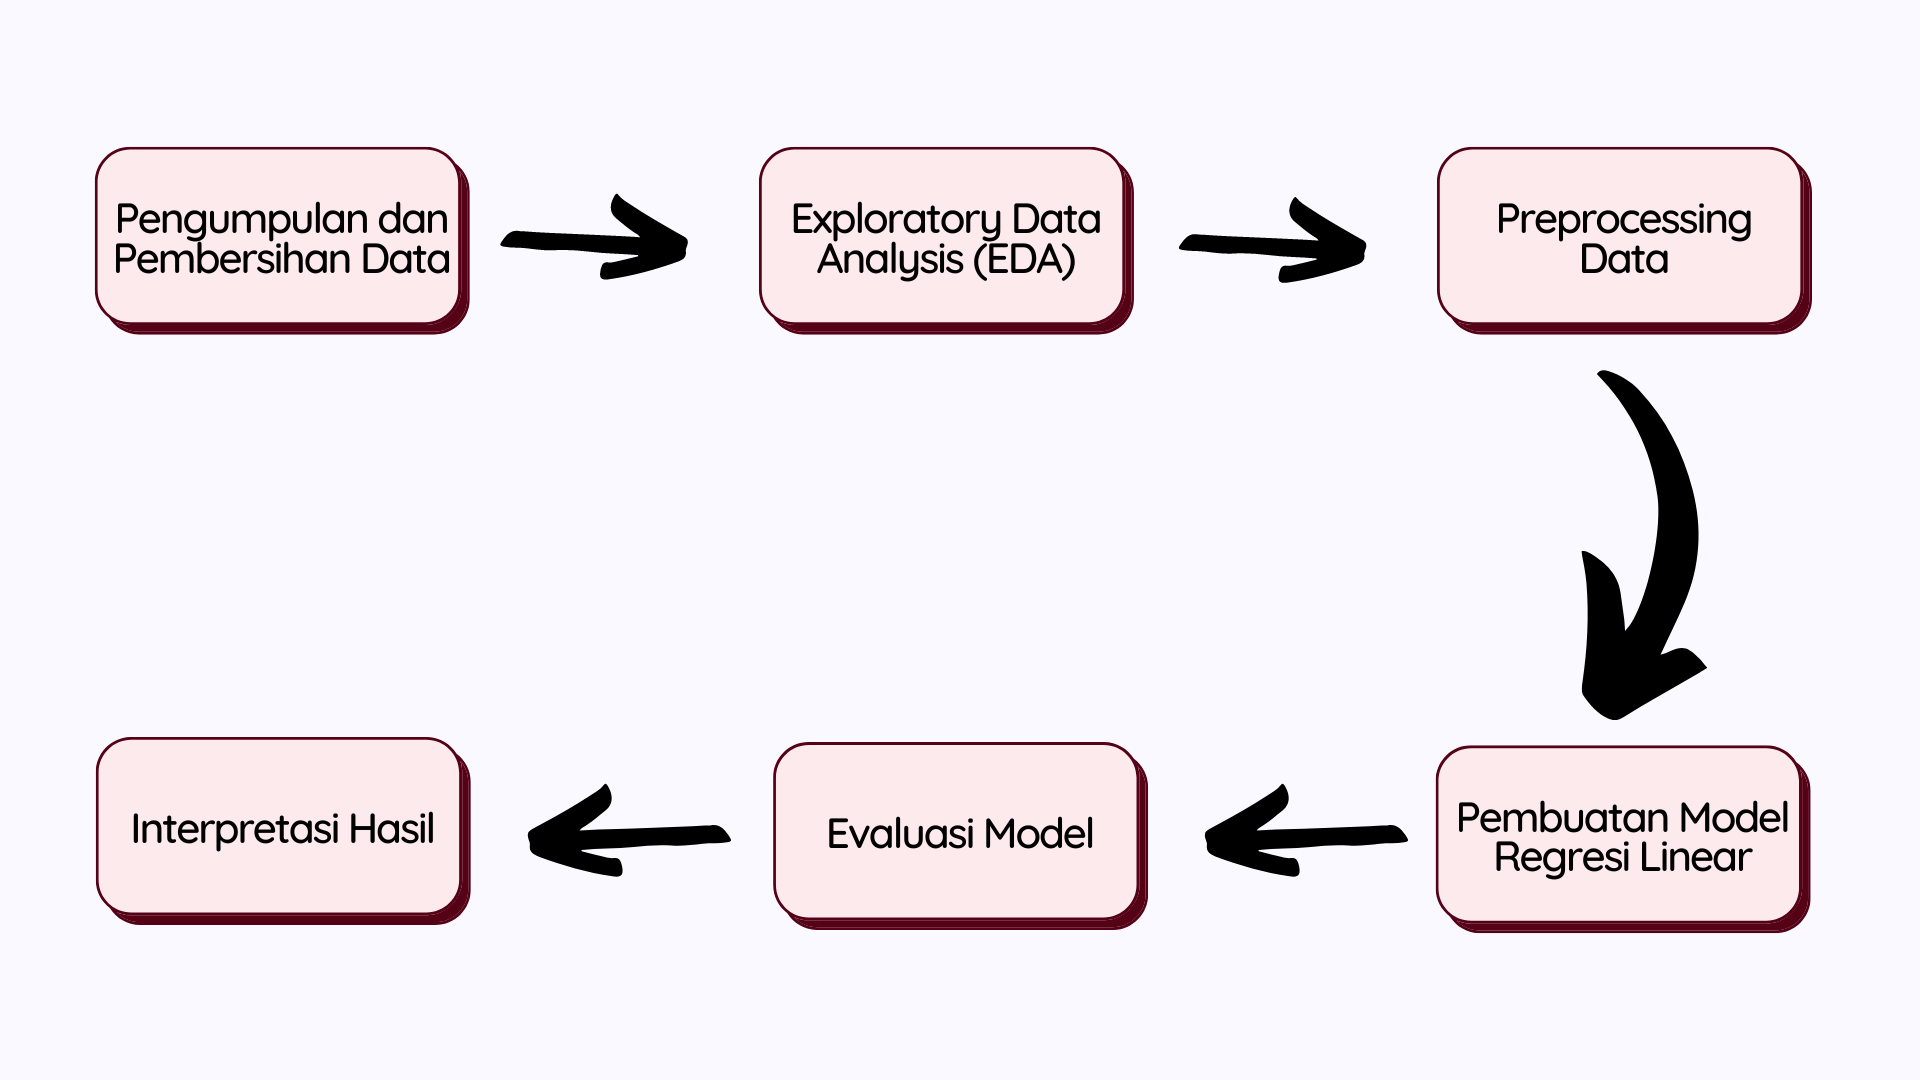

# 2.PENJELASAN DATASET,EDA,DAN PROSES FEATURES DATASET

**Dataset** yang digunakan dalam project ini adalah "Daftar harga rumah di kawasan Tebet dan Jaksel” dari Kaggle ( https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah). Dataset ini berisi daftar harga rumah di kawasan tebet dan jaksel. Dataset ini dipilih karena memiliki jumlah data yang besar dan memiliki beragam kolom termasuk,kamar tidur, harga, luas bangunan, garasi, dll.
Dataset " Daftar harga rumah di kawasan Tebet dan Jaksel " merupakan dataset publik yang tersedia secara gratis di Kaggle. Dataset ini dapat diakses dan diunduh oleh siapa saja.


# Experiment

## Disable warning

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Load data

In [5]:
import pandas as pd

df = pd.read_excel('D:/kuliah/kuliah/ML-A11.2022.14180-UAS/DATA RUMAH.xlsx', sheet_name='Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


- Explanation of each attribute:
    1. Nama Rumah = House name
    2. LB = Total Building Area
    3. LT = Total Land Area
    4. KT = Number of Bedrooms
    5. KM = Number of Bathrooms
    6. GRS = Number of Car Capacity in the Garage
    7. Harga =  House prices (IDR)

In [6]:
df.shape

(1010, 8)

In [7]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [8]:
df = df.loc[:,['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']]
df.head()

,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


## Exploratory Data Analysis

### Data information
statistical description of the mean, quartiles, standard deviation, etc

In [9]:
df.describe()

,LB,LT,KT,KM,GRS,HARGA
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7.628987e+09
std,177.864557,179.957604,1.572776,1.420066,1.510998,7.340946e+09
min,40.000000,25.000000,2.000000,1.000000,0.000000,4.300000e+08
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3.262500e+09
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5.000000e+09
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9.000000e+09
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,6.500000e+10


### Identify outliers

#### Identification of outlier attribute LB

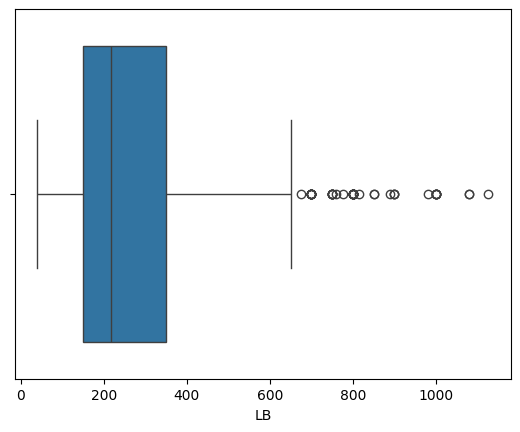

In [10]:
import seaborn as sns

sns.boxplot(x='LB', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the LB attribute are outliers

In [11]:
import numpy as np

q11,q31=np.percentile(df['LB'], [25,75])
s1 = q31-q11
ba1 = q31+(1.5*s1)
bw1 = q11-(1.5*s1)
print(q11)
print(q31)
print(s1)
print(ba1)
print(bw1)

150.0
350.0
200.0
650.0
-150.0


In [12]:
# shows outlier data on the LB attribute
dt1 = df[(df['LB']<bw1) | (df['LB']>ba1)]
dt1.head()

,LB,LT,KT,KM,GRS,HARGA
31,900,600,7,7,1,42000000000
50,850,600,7,7,0,41000000000
54,750,610,8,6,4,23000000000
102,800,1225,6,9,2,15000000000
103,800,752,6,4,0,30000000000


#### Identification of outlier attribute LT

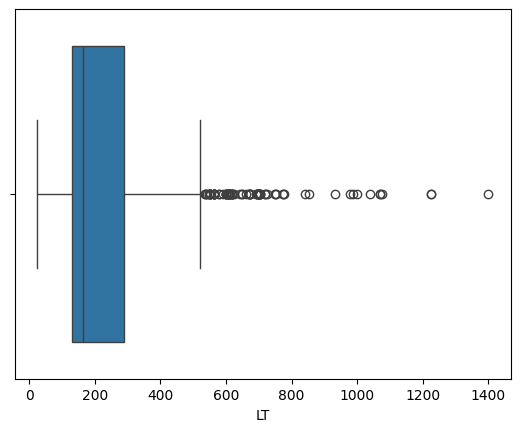

In [13]:
sns.boxplot(x='LT', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the LT attribute are outliers

In [14]:
q12,q32=np.percentile(df['LT'], [25,75])
s2 = q32-q12
ba2 = q32+(1.5*s2)
bw2 = q12-(1.5*s2)
print(q12)
print(q32)
print(s2)
print(ba2)
print(bw2)

130.0
290.0
160.0
530.0
-110.0


In [15]:
# shows outlier data on the LT attribute
dt2 = df[(df['LT']<bw2) | (df['LT']>ba2)]
dt2.head()

,LB,LT,KT,KM,GRS,HARGA
13,200,979,4,2,6,12500000000
20,300,700,8,5,2,14000000000
24,650,695,9,6,2,11000000000
31,900,600,7,7,1,42000000000
43,339,643,7,5,5,15000000000


#### Identification of outlier attribute KT

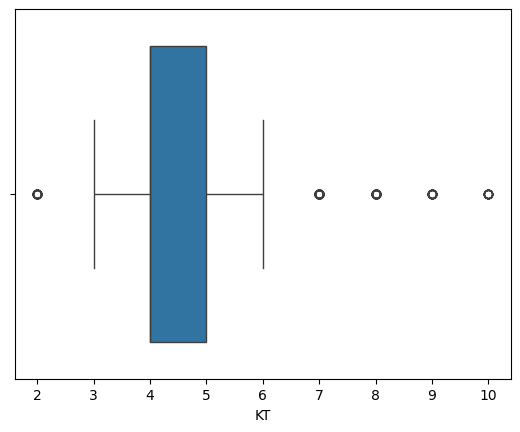

In [16]:
sns.boxplot(x='KT', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the KT attribute are outliers

In [17]:
q13,q33=np.percentile(df['KT'], [25,75])
s3 = q33-q13
ba3 = q33+(1.5*s3)
bw3 = q13-(1.5*s3)
print(q13)
print(q33)
print(s3)
print(ba3)
print(bw3)

4.0
5.0
1.0
6.5
2.5


In [18]:
# shows outlier data on the KT attribute
dt3 = df[(df['KT']<bw3) | (df['KT']>ba3)]
dt3.head()

,LB,LT,KT,KM,GRS,HARGA
3,40,25,2,2,0,430000000
20,300,700,8,5,2,14000000000
21,315,218,7,3,2,8000000000
22,75,75,2,3,0,700000000
24,650,695,9,6,2,11000000000


#### Identification of outlier attribute KM

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the KM attribute are outliers

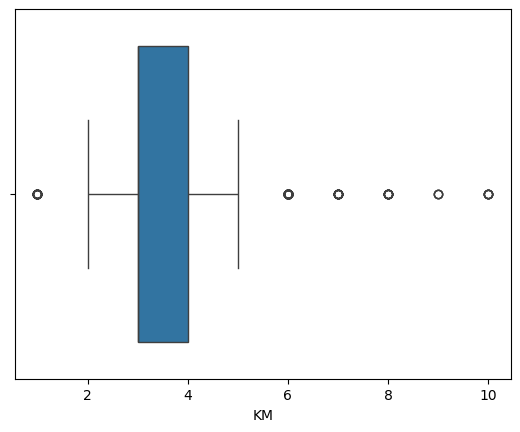

In [19]:
sns.boxplot(x='KM', data=df);

In [20]:
q14,q34=np.percentile(df['KM'], [25,75])
s4 = q34-q14
ba4 = q34+(1.5*s4)
bw4 = q14-(1.5*s4)
print(q14)
print(q34)
print(s4)
print(ba4)
print(bw4)

3.0
4.0
1.0
5.5
1.5


In [21]:
# shows outlier data on the KM attribute
dt4 = df[(df['KM']<bw4) | (df['KM']>ba4)]
dt4.head()

,LB,LT,KT,KM,GRS,HARGA
24,650,695,9,6,2,11000000000
31,900,600,7,7,1,42000000000
32,102,102,2,1,0,1100000000
34,145,200,8,8,1,3600000000
45,450,240,9,9,0,6000000000


#### Identification of outlier attribute GRS

<Axes: xlabel='GRS'>

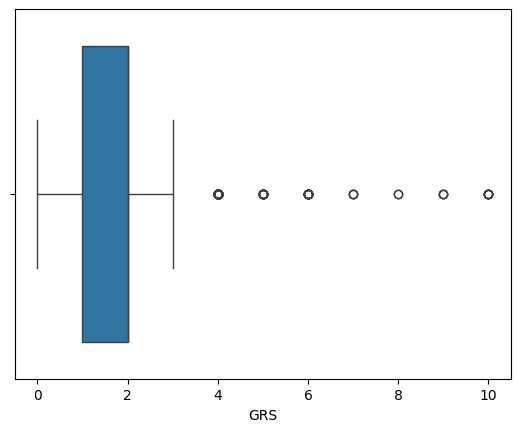

In [22]:
sns.boxplot(x='GRS', data=df)

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the GRS attribute are outliers

In [23]:
q15,q35=np.percentile(df['GRS'], [25,75])
s5 = q35-q15
ba5 = q35+(1.5*s5)
bw5 = q15-(1.5*s5)
print(q15)
print(q35)
print(s5)
print(ba5)
print(bw5)

1.0
2.0
1.0
3.5
-0.5


In [24]:
# shows outlier data on the GRS attribute
dt5 = df[(df['GRS']<bw5) | (df['GRS']>ba5)]
dt5.head()

,LB,LT,KT,KM,GRS,HARGA
2,267,250,4,4,4,3000000000
13,200,979,4,2,6,12500000000
19,450,248,5,5,4,9700000000
27,300,200,5,5,4,6500000000
43,339,643,7,5,5,15000000000


#### Identification of outlier attribute Harga

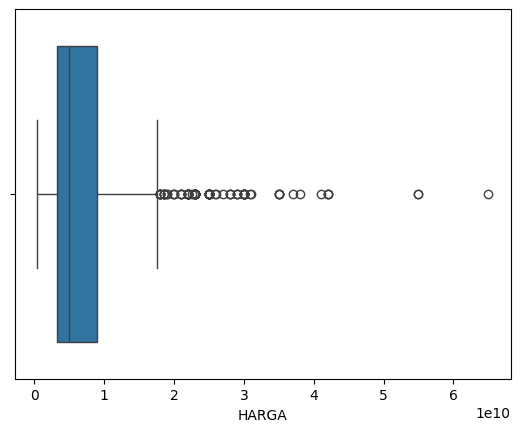

In [25]:
sns.boxplot(x='HARGA', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the Harga attribute are outliers

In [26]:
q16,q36=np.percentile(df['HARGA'], [25,75])
s6 = q36-q16
ba6 = q36+(1.5*s6)
bw6 = q16-(1.5*s6)
print(q16)
print(q36)
print(s6)
print(ba6)
print(bw6)

3262500000.0
9000000000.0
5737500000.0
17606250000.0
-5343750000.0


In [27]:
# shows outlier data on the Harga attribute
dt6 = df[(df['HARGA']<bw6) | (df['HARGA']>ba6)]
dt6.head()

,LB,LT,KT,KM,GRS,HARGA
18,200,251,5,3,3,18000000000
31,900,600,7,7,1,42000000000
50,850,600,7,7,0,41000000000
54,750,610,8,6,4,23000000000
61,300,410,5,3,0,18000000000


### Data distribution

#### Distribution of data from attribute LB

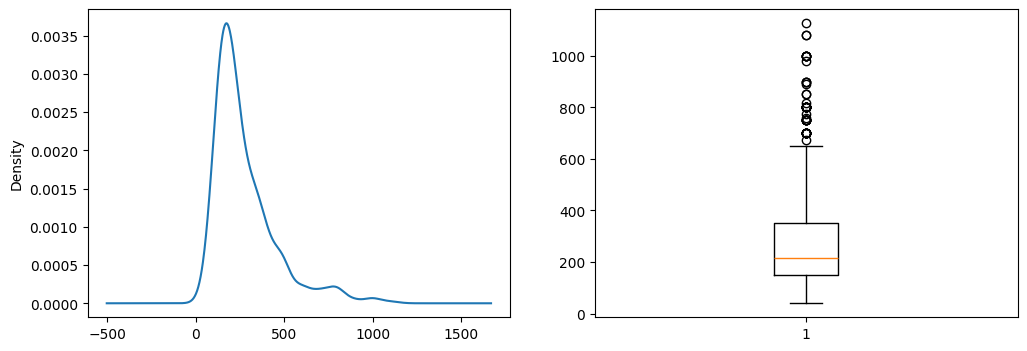

In [28]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')

f.add_subplot(1,2,2 )
plt.boxplot(df['LB'])

plt.show()

- Shows that most of the Building Area is at 200
- Data has many outliers

#### Distribution of data from attribute LT

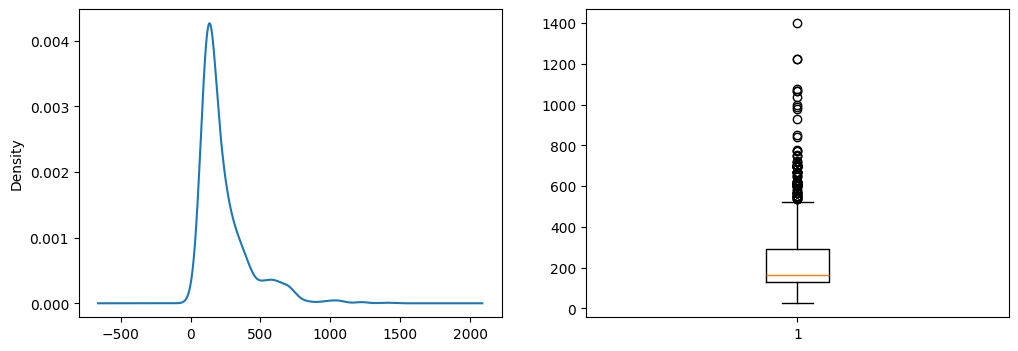

In [29]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['LT'])

plt.show()

- shows that most of the Land Area is in the number 200
- Data has many outliers

#### Distribution of data from attribute KT

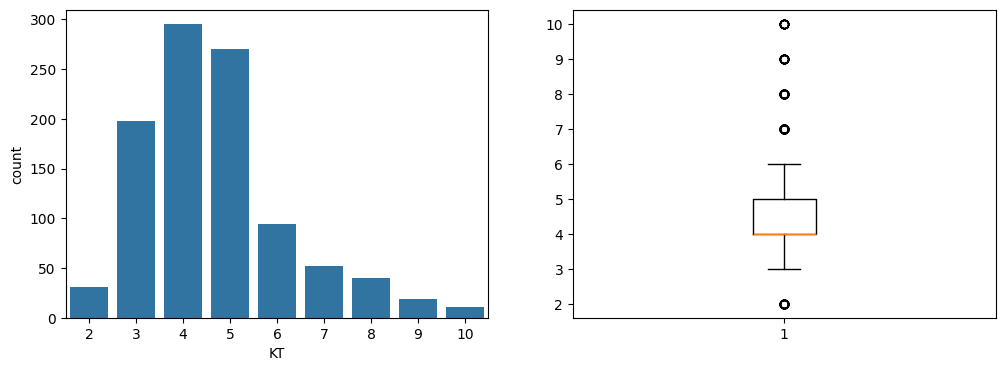

In [30]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KT'])

f.add_subplot(1,2,2)
plt.boxplot(df['KT'])

plt.show()

- Shows that most of the Number of Bedrooms is 4 and 5
- Data has few outliers

#### Distribution of data from attribute KM

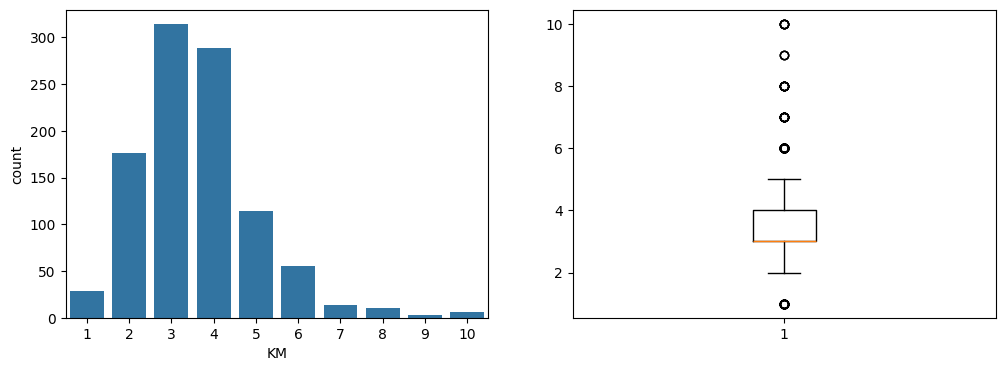

In [31]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KM'])

f.add_subplot(1,2,2)
plt.boxplot(df['KM'])

plt.show()

- Shows that most of the Number of Bathrooms is 4 and 5
- Data has few outliers

#### Distribution of data from attribute GRS

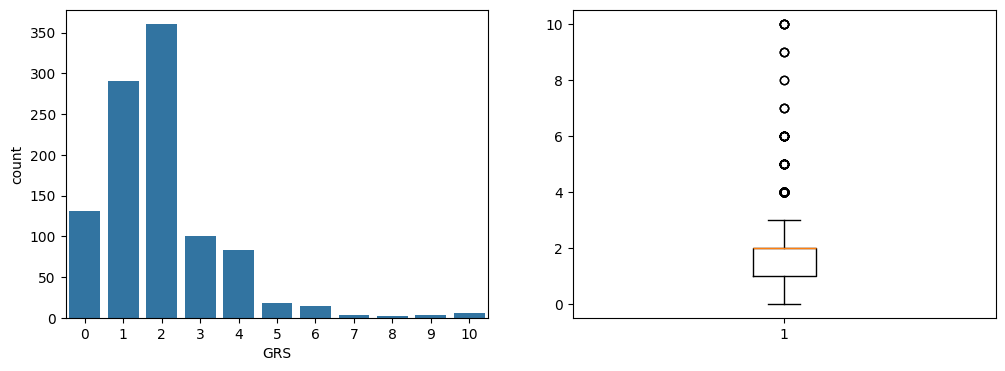

In [32]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['GRS'])

f.add_subplot(1,2,2)
plt.boxplot(df['GRS'])

plt.show();

- Shows that most of the Total Garage Capacity is 1 and 2 cars
- Data has few outliers

#### Distribution of data from attribute Harga

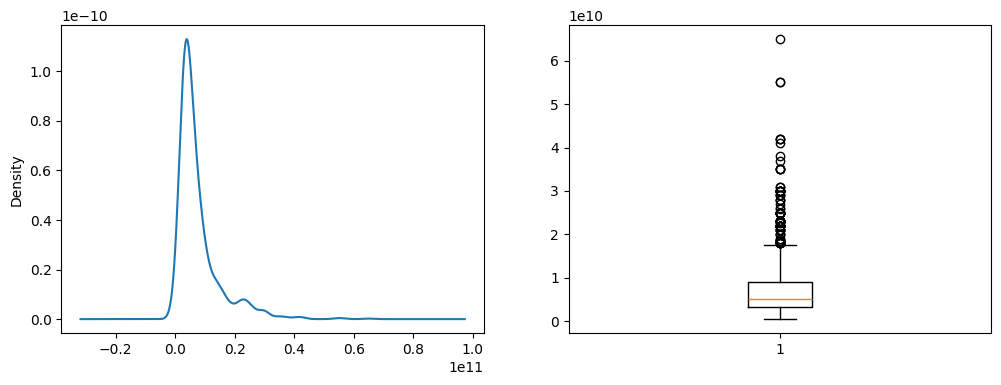

In [33]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['HARGA'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['HARGA'])

plt.show()

### Correlation between independent and dependent variable

<Figure size 1000x800 with 0 Axes>

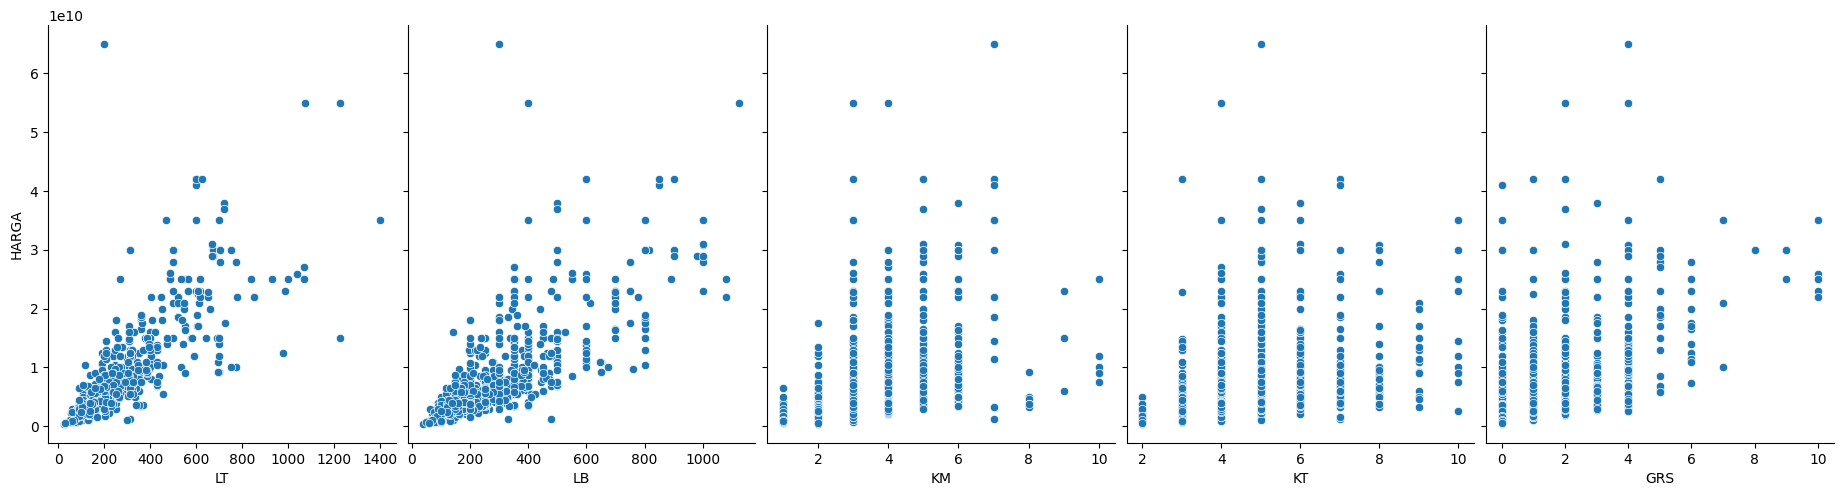

In [34]:
# Bivariate analysis between independent variables and dependent variables
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LT', 'LB', 'KM', 'KT', 'GRS'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

## Classic assumption test

In [35]:
x = df.drop(columns=['HARGA'])
y = df['HARGA']

In [36]:
import statsmodels.api as sm

model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  HARGA   R-squared (uncentered):               -2754.039
Model:                            OLS   Adj. R-squared (uncentered):          -2767.745
Method:                 Least Squares   F-statistic:                             -200.9
Date:                Sat, 20 Jul 2024   Prob (F-statistic):                        1.00
Time:                        17:08:29   Log-Likelihood:                         -23742.
No. Observations:                1010   AIC:                                  4.749e+04
Df Residuals:                    1005   BIC:                                  4.752e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LB          1.232e+07   1.14e+06     10.812      0.000    1.01e+07    1.46e+07
LT          2.375e+07   1.06e+06     22.302      0.000    2.17e+07    2.58e+07
KT         -7.242e+08   9.33e+07     -7.761      0.000   -9.07e+08   -5.41e+08
KM          4.091e+08   1.24e+08      3.292      0.001    1.65e+08    6.53e+08
GRS         2.908e+08   9.61e+07      3.025      0.003    1.02e+08    4.79e+08
==============================================================================
Omnibus:                      922.378   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99625.072
Skew:                           3.708   Prob(JB):                         0.00
Kurtosis:                      51.087   Cond. No.                         523.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# adding a constant variable
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HARGA   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     506.8
Date:                Sat, 20 Jul 2024   Prob (F-statistic):          1.25e-271
Time:                        17:08:29   Log-Likelihood:                -23740.
No. Observations:                1010   AIC:                         4.749e+04
Df Residuals:                    1004   BIC:                         4.752e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.417e+08      4e+08     -1.856      0.064   -1.53e+09    4.27e+07
LB          1.232e+07   1.14e+06     10.824      0.000    1.01e+07    1.46e+07
LT          2.366e+07   1.06e+06     22.221      0.000    2.16e+07    2.57e+07
KT         -6.195e+08   1.09e+08     -5.686      0.000   -8.33e+08   -4.06e+08
KM          4.555e+08   1.27e+08      3.598      0.000    2.07e+08    7.04e+08
GRS           3.1e+08   9.66e+07      3.209      0.001     1.2e+08    4.99e+08
==============================================================================
Omnibus:                      908.406   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98134.485
Skew:                           3.611   Prob(JB):                         0.00
Kurtosis:                      50.747   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normality test

In the normality test we use the Prob Jarque Bera (JB) value from the above test of 0.00. With the following hypothesis:

- Determine the Hypothesis
     - H0 : Residuals are normally distributed
     - H1 : Residuals are not normally distributed
- Significance level
     - ∝=5% (∝=0.05)
- Test Statistics
     - p-value = 0.00
- Critical area
     - Reject H0 if p-value < α
- Decision
     - Because the p-value is equal to 0.00, where the p-value < α is 0.00 < 0.05, then reject H0.
- Conclusion
     - In this dataset the data is not normally distributed

### Multicollinearity test

In [38]:
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols(formula = "HARGA~LB+LT+KT+KM+GRS", data = df).fit()
Y,X = dmatrices ("HARGA~LB+LT+KT+KM+GRS", data = df, return_type ="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

[10.500700619760497, 2.6902235160668386, 2.4102909422599326, 1.9280243602936888, 2.1222604720799545, 1.398235535323092]


Multicollinearity test to show whether there is a correlation between the independent variables in multiple linear regression.
- Determine the Hypothesis
     - H0 : VIF < 10 means there is no multicollinearity.
     - H1 : VIF > 10 means that there is multicollinearity.
- Significance level
     - ∝=5% (∝=0.05)
- Test Statistics
     - VIF :
     - Constant = 10,500
     -LB = 2,690
     - LT = 2,410
     - KT = 1,928
     - Miles = 2,122
     - GRS = 2,122
- Critical Area
     - Reject H0 if VIF > ∝
- Decision
     - Because the VIF value (LB = 2,690, LT = 2,410, KT = 1,928, KM = 2,122, and GRS = 2,122) < α then fails to Reject H0
- Conclusion
     - So, the data set does not have multicollinearity

### Heteroscedasticity test

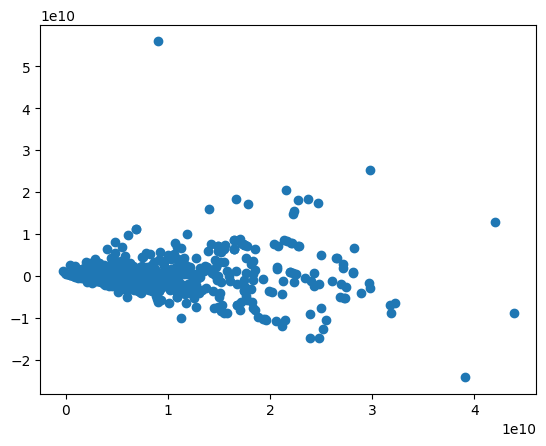

In [39]:
lm=smf.ols(formula="HARGA~LB+LT+KT+KM+GRS",data=df).fit()
lm
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [40]:
import statsmodels.stats as stats

stats.diagnostic.het_white(resid, lm.model.exog)

(137.16019937750303,
 1.7462172530239566e-19,
 7.7706949824931115,
 4.274750011791245e-21)

Based on the results of the heteroscedasticity test, it can be seen that the dots have no clear shape. And the scatter points above and below the number 0 on the Y axis. So it can be concluded that there is no heteroscedasticity problem in the regression model.

## Partial test

Partial test is used to determine whether the independent variable (X) has a significant (real) impact on the dependent variable (Y). From the data above, the p-value (Constant) is 0.064, the value (LB) is 0.000, the value (LT) is 0.000, the value (KT) is 0.000, the value (KM) is 0.000, and the value (GRS) is 0.001.
Here's the hypothesis:
- Hypothesis
     - H0 : βi = 0, i = 0,1,2 (There is no significant effect between X and Y)
     - H1 : βi ≠ 0, i = 0,1,2 (There is a significant effect between X and Y)
- Significance level
     - ∝=5% = 0.05
- Critical area
     - If p-value ≤ ∝ (0.05) → Reject H0
     - P-value : = 0.001 and = 0.000 ; ∝= 0.05
- Decision
     - Because the p-value for β1, β2, β3, β4, β5 < ∝ then reject
- Conclusion
     - In the dataset there is a significant influence between variable X (LB, LT, KT, KM, GRS) and variable Y (Harga).

## 4.Modelling

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

Accuracy: 75.81%


In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
# shows the value of the slope/coefficient) and intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.10880140e+07  2.55042911e+07 -7.06746126e+08  6.04492965e+08
  2.65644335e+08]
-713902832.9008512


In [60]:
coef_dict = {
    'features':x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns = ['features', 'coef_value'])
coef

,features,coef_value
0,LB,1.108801e+07
1,LT,2.550429e+07
2,KT,-7.067461e+08
3,KM,6.044930e+08
4,GRS,2.656443e+08


- from the above values, if put into the formula it becomes: Y = 1.057*1 + 2.569*2 + (-6.260)*3 + 4.280*4 + 2.648*5 + -482584002

## 5.PERFORMA MODEL


In [61]:
y_pred = lin_reg.predict(X_test)
print("Accuracy %.2f%%" % (lin_reg.score(X_test, y_test)*100))

Accuracy 75.49%


### Case study

- Samuel wants to find a criteria house in DKI Jakarta with the following criteria:
     1. Building Area (LB) = 100
     2. Land Area (LT) = 300
     3. Number of Bedrooms = 3
     4. Number of Bathrooms = 2
     5. Car capacity in garage (GRS) = 1

In [62]:
import math

print("Samuel's dream house costs approx IDR {:,} million".format(math.floor(lin_reg.predict([[100, 300, 3, 2, 1]])/1000000)))

Samuel's dream house costs approx IDR 7,400 million


# 6.Hasil / Performa Model

Setelah melakukan percobaan regresi linier pada peramalan harga rumah di Jakarta dan Tebet diperoleh akurasi prediksi sebesar 75.49%. Meskipun hasil ini menunjukkan bahwa model ini mampu membuat prediksi yang cukup akurat, namun masih ada ruang untuk perbaikan. Analisis lebih lanjut terhadap data dan penyempurnaan model berpotensi meningkatkan keakuratan perkiraan ini. Meskipun demikian, eksperimen ini memberikan wawasan berharga mengenai faktor-faktor yang mempengaruhi harga rumah di wilayah tersebut dan menunjukkan kegunaan regresi linier sebagai alat untuk menganalisis tren pasar real estate.

# 7.Hasil Diskusi dan Kesimpulan

Sebagai kesimpulan, eksperimen regresi linier yang dilakukan untuk peramalan harga rumah di Jakarta dan Tebet telah menunjukkan efektivitas metode ini dalam menganalisis tren pasar real estate serta membuat prediksi mengenai harga di masa depan. Dengan akurasi model sebesar 75.49%, penelitian ini sudah memberikan hasil yang cukup baik, namun demikian masih ada ruang untuk peningkatan melalui penyempurnaan lebih lanjut pada dataset dan model itu sendiri. Melalui pendekatan yang lebih cermat dan terperinci, kita dapat meningkatkan keandalan prediksi dan memberikan informasi yang lebih akurat kepada para pemangku kepentingan.

Salah satu rekomendasi utama untuk eksperimen di masa depan adalah melakukan normalisasi dataset sebelum analisis. Normalisasi berfungsi untuk meningkatkan akurasi model dengan menyesuaikan skala variabel sehingga memiliki rentang dan distribusi yang sama. Langkah ini dapat membantu dalam mengurangi bias dan variabilitas yang mungkin timbul dari perbedaan skala antar variabel. Selain itu, penting juga untuk mengeksplorasi faktor-faktor tambahan yang mungkin mempengaruhi harga rumah di Jakarta dan Tebet, seperti indikator ekonomi, kondisi pasar lokal, kebijakan pemerintah, dan data demografis, yang semuanya dapat memberikan gambaran lebih komprehensif tentang dinamika harga.

Secara keseluruhan, eksperimen ini telah memberikan wawasan berharga mengenai pasar perumahan di Jakarta dan Tebet serta menyoroti potensi regresi linier sebagai alat yang efektif untuk peramalan real estate. Dengan terus menyempurnakan dan memperbaiki metode ini, para peneliti dan profesional industri dapat memperoleh pemahaman yang lebih mendalam tentang tren pasar dan membuat prediksi yang lebih akurat mengenai harga di masa depan. Hal ini tidak hanya bermanfaat bagi para pembeli dan penjual rumah, tetapi juga bagi pengembang properti, perencana kota, dan pembuat kebijakan dalam merancang strategi yang lebih baik untuk pengembangan pasar perumahan yang berkelanjutan dan sehat.
